### Agenda
* Implementing KMeans

### Steps in KMeans
* Randomy assign centroids
* Assign data to nearest centroids
* Recalculate the centroid
* Repeat above two steps

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
feature_data = iris.data

In [16]:
feature_data = feature_data[:,[0,1]]

In [17]:
feature_data.shape

(150, 2)

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Cluster feature_data into 3 classes

In [202]:
import numpy as np
import pandas as pd

In [480]:
class MyKMeans:
    def __init__(self,n_clusters=3):
        self.n_clusters = n_clusters
        
    def my_fit(self, feature_data, centroids=[[4.8,3.2],[5.5,2.5],[7.5,3]]):
        self.feature_data = np.array(feature_data)
        self.data_centroid = []
        self.centroids = np.array(centroids)
            
    def assign_data_to_centroid(self):
        fd = self.feature_data.reshape(150,1,2)
        cd = self.centroids.reshape(1,3,2)
        distances = np.sqrt(np.sum(np.square(fd - cd),axis=2))
        self.data_centroid = np.argmin(distances,axis=1)
        self.distance_centroid = np.min(distances,axis=1)
        return self.data_centroid
    
    def recalculate_centroid(self):
        def f(d):
            res = np.round([d['F1'].sum()/d.shape[0],d['F2'].sum()/d.shape[0]],3)
            self.centroids.append(np.array(res))
            
        self.centroids = []
        df = pd.DataFrame({'Centroid':self.data_centroid,'F1':self.feature_data[:,0],'F2':self.feature_data[:,1]})
        df.groupby('Centroid').apply(f)
        self.centroids = np.array(self.centroids)  
        
    def my_cost(self):
        return self.distance_centroid.sum()

In [481]:
myKmeans = MyKMeans(n_clusters=3)

In [482]:
myKmeans.my_fit(feature_data)

In [483]:
import matplotlib.pyplot as plt
%matplotlib inline

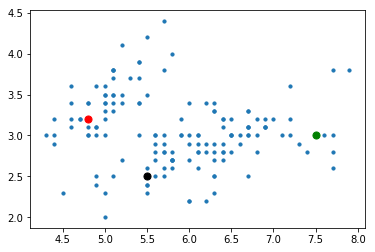

In [484]:
plt.scatter(myKmeans.feature_data[:,0], myKmeans.feature_data[:,1],s=10)
plt.scatter(myKmeans.centroids[:1,0], myKmeans.centroids[:1,1], s=50, c='r')
plt.scatter(myKmeans.centroids[1:2,0], myKmeans.centroids[1:2,1], s=50, c='k')
plt.scatter(myKmeans.centroids[2:3,0], myKmeans.centroids[2:3,1], s=50, c='g')

In [485]:
closer_centroid = myKmeans.assign_data_to_centroid()

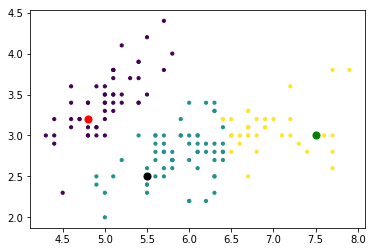

In [486]:
plt.scatter(feature_data[:,0], feature_data[:,1],s=10,c=closer_centroid)
plt.scatter(centroids[:1,0], centroids[:1,1], s=50, c='r')
plt.scatter(centroids[1:2,0], centroids[1:2,1], s=50, c='k')
plt.scatter(centroids[2:3,0], centroids[2:3,1], s=50, c='g')

In [487]:
myKmeans.my_cost()

88.60482492151777

### Understanding Distance Vector Calculation using Broadcasting

In [488]:
data1 = np.array([[1,1],[2,3],[4,5],[6,7]])
data2 = np.array([[1,1],[2,2]])

In [489]:
data1.shape

(4, 2)

In [490]:
data2.shape

(2, 2)

In [491]:
res = data1.reshape(4,1,2) - data2.reshape(1,2,2)

In [492]:
res.shape

(4, 2, 2)

In [493]:
res2 = np.square(res)

In [494]:
np.argmin(np.sum(res2,axis=2),axis=1)

array([0, 1, 1, 1])

<hr>

* Current centroid

In [495]:
myKmeans.centroids

array([[4.8, 3.2],
       [5.5, 2.5],
       [7.5, 3. ]])

* Default centroids

In [496]:
myKmeans.recalculate_centroid()

In [497]:
myKmeans.centroids

array([[5.006, 3.428],
       [5.863, 2.751],
       [6.941, 3.078]])

In [498]:
closer_centroid = myKmeans.assign_data_to_centroid()

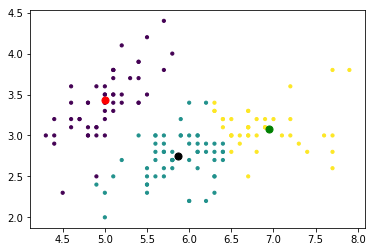

In [499]:
plt.scatter(myKmeans.feature_data[:,0], myKmeans.feature_data[:,1],s=10,c=closer_centroid)
plt.scatter(myKmeans.centroids[:1,0], myKmeans.centroids[:1,1], s=50, c='r')
plt.scatter(myKmeans.centroids[1:2,0], myKmeans.centroids[1:2,1], s=50, c='k')
plt.scatter(myKmeans.centroids[2:3,0], myKmeans.centroids[2:3,1], s=50, c='g')

In [500]:
myKmeans.my_cost()

64.12423865823158

* Repeat

In [501]:
myKmeans.recalculate_centroid()

In [502]:
myKmeans.centroids

array([[5.004, 3.41 ],
       [5.848, 2.719],
       [6.88 , 3.098]])

In [503]:
closer_centroid = myKmeans.assign_data_to_centroid()

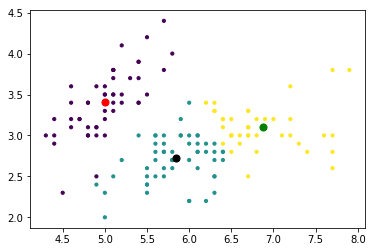

In [504]:
plt.scatter(myKmeans.feature_data[:,0], myKmeans.feature_data[:,1],s=10,c=closer_centroid)
plt.scatter(myKmeans.centroids[:1,0], myKmeans.centroids[:1,1], s=50, c='r')
plt.scatter(myKmeans.centroids[1:2,0], myKmeans.centroids[1:2,1], s=50, c='k')
plt.scatter(myKmeans.centroids[2:3,0], myKmeans.centroids[2:3,1], s=50, c='g')

In [505]:
myKmeans.my_cost()

63.327626747474284

* Repeat

In [450]:
myKmeans.recalculate_centroid()

In [451]:
myKmeans.centroids

array([[5.004, 3.41 ],
       [5.832, 2.704],
       [6.853, 3.1  ]])